In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
obs = np.load('mask1/mask_obs.npy')
action = np.load('mask1/action.npy')

In [3]:
print(obs[:,2][50:100])

[-0.03222053 -0.07928441 -0.12676974 -0.17461776 -0.22276795 -0.2711657
 -0.31974989 -0.36845244 -0.41720192 -0.46592809 -0.51457821 -0.56308924
 -0.61141314 -0.65950844 -0.70735281 -0.75492862 -0.8022046  -0.84915583
 -0.89577389 -0.9420606  -0.98799926 -1.03357347 -1.07876833 -1.12357675
 -1.1679875  -1.21200236 -1.25562062 -1.29886346 -1.34174096 -1.38427292
 -1.42647099 -1.46834222 -1.50988882 -1.55111919 -1.59204017 -1.63264799
 -1.67294056 -1.7129203  -1.75259809 -1.79197164 -1.83103342 -1.86976542
 -1.90816355 -1.94622747 -1.98395002 -2.02132376 -2.05833715 -2.09498373
 -2.13126024 -2.1671682 ]


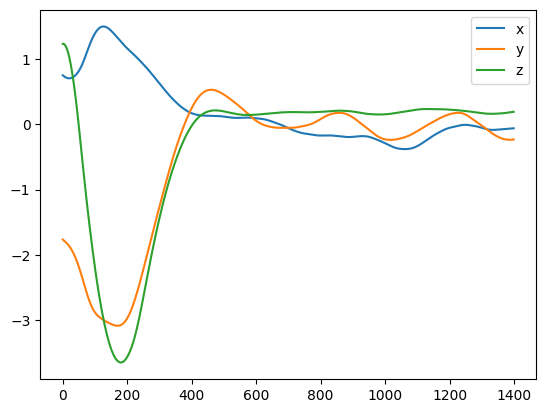

In [11]:
length = 1400
index = np.arange(length)

# plt.figure(figsize=(10, 10))
plt.plot(index, obs[:,0], label='x')
plt.plot(index, obs[:,1], label='y')
plt.plot(index, obs[:,2], label='z')
plt.legend()

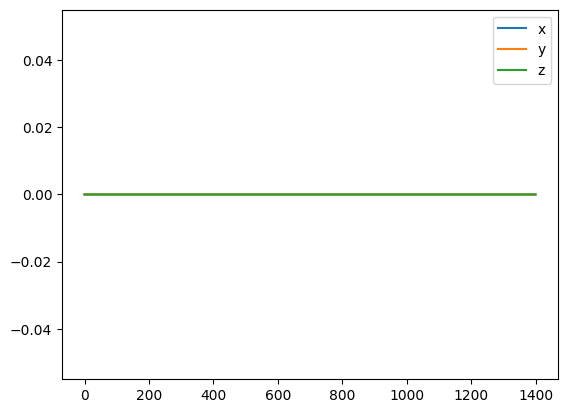

In [12]:
length = 1400
index = np.arange(length)

# plt.figure(figsize=(10, 10))
plt.plot(index, obs[:,3], label='x')
plt.plot(index, obs[:,4], label='y')
plt.plot(index, obs[:,5], label='z')
plt.legend()

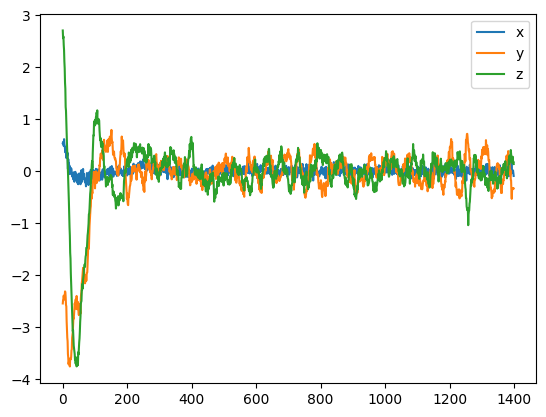

In [9]:
plt.plot(index, obs[:,-1], label='x')
plt.plot(index, obs[:,-2], label='y')
plt.plot(index, obs[:,-3], label='z')
plt.legend()

In [13]:
#旋转矩阵转欧拉角
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6


# Calculates rotation matrix to euler angles
# The result is the same as MATLAB except the order
# of the euler angles ( x and z are swapped ).
def rotationMatrixToEulerAngles(R) :
    if not isRotationMatrix(R):
        u,s,v = np.linalg.svd(R.reshape(3,3))
        R = u @v
    
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
    
    singular = sy < 1e-6

    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0

    return np.array([x, y, z])

In [ ]:
rotation_matrix = obs[:, 6:15]

euler = []

for i in range(len(rotation_matrix)):
    
    matrix = rotation_matrix[i].reshape(3, 3)
    euler = rotationMatrixToEulerAngles(matrix)
    euler.append(euler)